In [168]:
%pylab inline
import ismdensgen as ism
reload(ism)

#For timing purposes
import time as tm
import datetime as dt

#Fiddling with maps
from astropy.wcs import WCS
from astropy.io import fits
from astropy.coordinates import Angle
from astropy import units as u
from scipy import stats
import astropy
import ConfigParser

mpl.rcParams['figure.figsize'] = [8.0, 6.0]
mpl.rcParams['figure.dpi'] = 80
mpl.rcParams['savefig.dpi'] = 100

mpl.rcParams['font.size'] = 12
mpl.rcParams['legend.fontsize'] = 'large'
mpl.rcParams['figure.titlesize'] = 'medium'

Populating the interactive namespace from numpy and matplotlib


## Function definitions

In [230]:
def checkEnergies(e51_ia, e51_cc):
    """
    Make sure the generated energies are consistent with the generating PDFs
    """
    
    #1) Check the means
    print 'Mean of log E in 10^51 ergs (SN Ia) = ',np.mean(np.log10(e51_ia))
    print 'Mean of log E in 10^51 ergs (SN CC) = ',np.mean(np.log10(e51_cc))

    #2) Check if the energies are log-normal
    plt.hist(np.log10(e51_ia), bins=50, histtype='step')
    plt.hist(np.log10(e51_cc), bins=50, histtype='step')
    plt.xlabel(r'$\rm{log}\ \left(E/10^{51}\ \rm{ergs}\right)$', fontsize=17)
    plt.xlim(-2,2)
    plt.show()
    
def show_pixels_on_Hmap(xp=[], yp=[], xp_comp=[], yp_comp=[], m33_map=[]):
    """
    Show any set of pixels on the 21 cm HI map of M33 (Gordon 2012)
    
    Input
    ------
    xp, yp - list or ndarray
        pixels to be plotted
        
    xp_comp, yp_comp - list or ndarray 
        pixels to be compared to xp, yp
    """
    
    i0, j0, width, height = ism.GordonSurveyArea()
    
    plt.figure(figsize=(9,7))
#   plt.rc('font', family='serif')
    H2imgplot = plt.imshow(m33_map[0]/1.0e21, cmap='Greys', origin='lower')
    H2imgplot.set_clim(1.0e19/1.0e21,8.0e21/1.0e21)
    #plt.plot(coords[0][:,0], coords[0][:,1], 'bx',ms=7,mew=1.2,label='Chomiuk09')
    #plt.plot([383], [472], 'ro',ms=6, label='J2000 center')
    #plt.text(200,270, 'G99 survey', fontsize=12)
    ax = plt.gca()
    ax.add_patch(mpl.patches.Rectangle((i0,j0),width=width, height=height, fill=False, color='k', linestyle='dashed',\
                                       linewidth=2))
    #plt.plot(coords[0][:,0], coords[0][:,1], 'x',color='r',ms=6,mew=1.2, label='Chomiuk &\nWilcots (2009)')
    plt.plot(xp,yp, 'o', ms=8)
    plt.plot(xp_comp, yp_comp, 'o')
#    plt.title('HI (21cm) map for M33 (Braun 2012)', fontsize=17, position = (0.5, 1.02))
    #hcbar = plt.colorbar(orientation='horizontal', ticks = [1.0, 3.0, 5.0, 7.0], pad=0.13, shrink =0.86)
    #hcbar.set_label(r'HI Density [$\times\ 10^{21}\ \rm{cm^{-2}}$]', fontsize=12)
    plt.tick_params(axis='y', labelsize='17', which='major')
    ax.set_xlabel(r'$\alpha_{2000}$',fontsize=17)
    ax.set_ylabel(r'$\delta_{2000}$',fontsize=17)
    plt.xlim(120,650)
    plt.ylim(170,800)
    plt.text(150, 265, 'Gordon (1999)\nsurvey area', fontsize=14)
    plt.legend(loc=1, numpoints=1, fontsize=14, bbox_to_anchor=(1.5, 1.02))
    ax.set_xticks([200,400,600])
    ax.set_yticks([300,500,700])
    #ax.grid()
    ax.set_yticklabels([r'$\mathrm{30^{o}16}$'+'\''+r'$\mathrm{28}$'+'\"',\
                         r'$\mathrm{30^{o}43}$'+'\''+r'$\mathrm{15}$'+'\"',\
                         r'$\mathrm{31^{o}9}$'+'\''+r'$\mathrm{54}$'+'\"'], rotation='vertical', fontsize=17)
    ax.set_xticklabels([r'$\mathrm{1^{h}35^{m}43^{s}}$', r'$\mathrm{1^{h}33^{m}40^{s}}$', r'$\mathrm{1^{h}31^{m}36^{s}}$'], fontsize=17)
    plt.grid()
    plt.show()

# Energy Map for default model

I'm attempting a simple energy map model for the default parameters from Sarbadhicary (2017). The energy map model will be in units of $10^{51}$ ergs

In [3]:
locx_ia = np.loadtxt('../Inputs/randompixels_x_ia.txt')
locy_ia = np.loadtxt('../Inputs/randompixels_y_ia.txt')
locx_cc = np.loadtxt('../Inputs/randompixels_x.txt')
locy_cc = np.loadtxt('../Inputs/randompixels_y.txt')

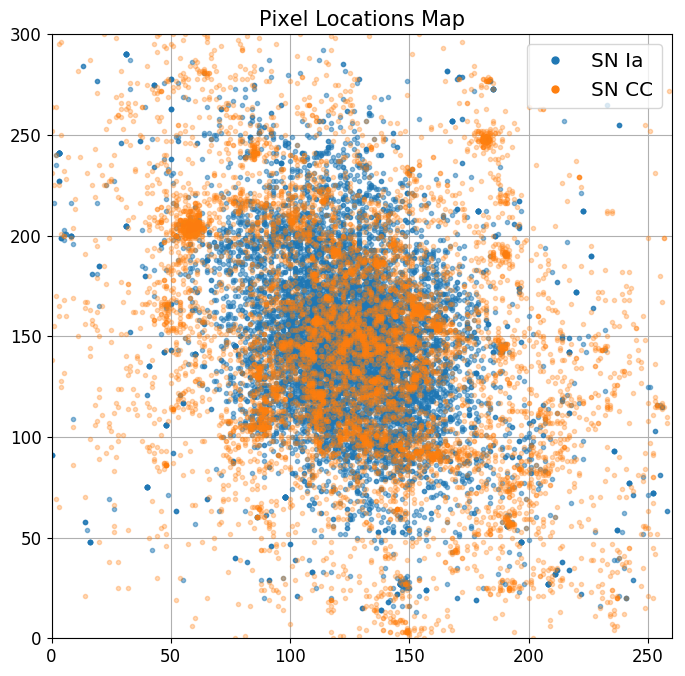

In [221]:
i0, j0, width, height = ism.GordonSurveyArea()
plt.figure(figsize=(8,8))
#Plot just 10000 points. Doing the whole dataset will saturate the map
if 1:
    plt.plot(locx_ia[0:10000], locy_ia[0:10000], '.', color='#1f77b4', alpha=0.5)
    plt.plot(locx_cc[0:10000], locy_cc[0:10000], '.', color='#ff7f0e', alpha=0.3)
    plt.plot([], [], '.', color='#1f77b4', ms=10, label='SN Ia')
    plt.plot([], [], '.', color='#ff7f0e', ms=10, label='SN CC')
if 0:
    H2imgplot = plt.imshow(m33_map[0]/1.0e21, cmap='Greys', origin='lower')
    H2imgplot.set_clim(1.0e19/1.0e21,8.0e21/1.0e21)
plt.title('Pixel Locations Map', fontsize=15)
plt.grid()
plt.xlim(0,260)
plt.ylim(0,300)
plt.legend()

plt.show()

Mean of log E in 10^51 ergs (SN Ia) =  -0.000105799138063
Mean of log E in 10^51 ergs (SN CC) =  -0.000101870373846


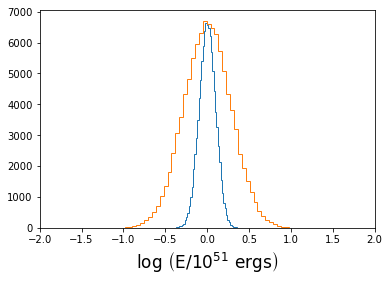

In [13]:
e51_ia = 10**(np.random.normal(loc = 51.0, scale = 0.1, size = 100000) - 51.0) #0.4 variance ensures Hypernova, PISNs etc occur 1/1000 times "normal" CCSN (Janka 2012)    \
e51_cc = 10**(np.random.normal(loc = 51.0, scale = 0.28, size = 100000) - 51.0)
checkEnergies(e51_ia, e51_cc)

In [257]:
frac_Ia2CC, rate = 0.8, 3.0e-3
rate_Ia = rate*(frac_Ia2CC/(1 + frac_Ia2CC))
rate_CC = rate*(1./(1 + frac_Ia2CC))
t_Ia = ism.timegen(rate_Ia)
t_CC = ism.timegen(rate_CC)
locx_Ia_new, locy_Ia_new = locx_ia[:t_Ia.size], locy_ia[:t_Ia.size]
locx_CC_new, locy_CC_new = locx_cc[:t_CC.size], locy_cc[:t_CC.size]


#Sort the Ia and CC SNe in order of when they formed.
t = np.concatenate([t_Ia, t_CC])
locx = np.concatenate([locx_Ia_new, locx_CC_new])
locy = np.concatenate([locy_Ia_new, locy_CC_new])
ek = np.concatenate([e51_ia[0:t_Ia.size], e51_cc[0:t_CC.size]])
args = np.argsort(t)
sorted_t = t[args]  #Here sorted means time-sorted
sorted_ek = ek[args]
sorted_locx = locx[args]
sorted_locy = locy[args]

Lets set an averaging interval (= 10^6 years). We want the energies and positions of all supernova that went off in this period. The period edges are (1-2) \times 10^6 years.

(3055,)


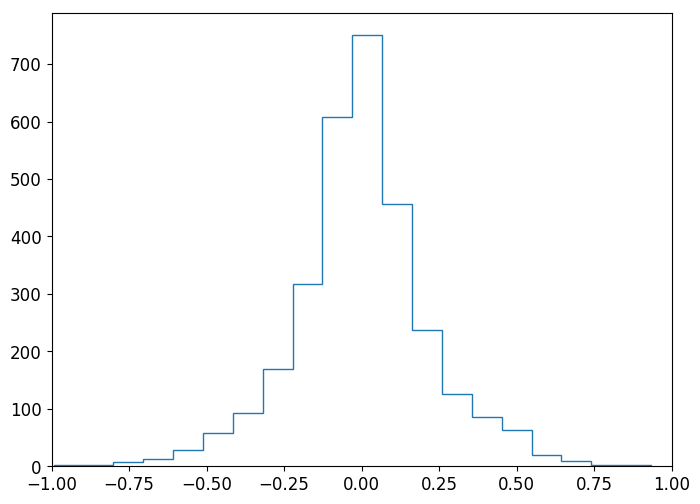

In [258]:
avgint = [1.0e6, 2.0e6]
whr_sn_avgint = np.where((sorted_t >=avgint[0]) & (sorted_t <= avgint[1])) #Number of supernova that went off 
                                                                                #during the averaging interval
print sorted_t[whr_sn_avgint].shape
sorted_ek_avgint = sorted_ek[whr_sn_avgint]
sorted_locx_avgint = sorted_locx[whr_sn_avgint]
sorted_locy_avgint = sorted_locy[whr_sn_avgint]


plt.hist(np.log10(sorted_ek[whr_sn_avgint]), bins=20, histtype='step')
plt.xlim(-1,1)
plt.show()

Now remember, the `loc_ia` and `loc_cc` arrays can still be treated as the random locations of the above sorted CC and Type Ia SN. I just generated them separately to save computation time.

/Users/sumits2k/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:5: RuntimeWarning: divide by zero encountered in log10


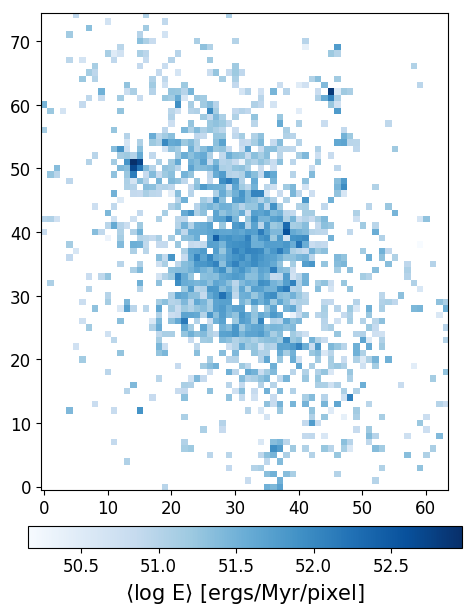

In [259]:
xbin = np.arange(0, width+1, 4)
ybin = np.arange(0, height+1, 4)
E_image = stats.binned_statistic_2d(sorted_locx_avgint, sorted_locy_avgint, sorted_ek_avgint, 'sum', \
                                   bins=[xbin, ybin])
plt.figure(figsize=(8,8))
plt.imshow(np.log10(E_image.statistic.T*1.0e51), origin='lower', cmap='Blues')
if 0:
    circle1 = plt.Circle((14,51), 3, color='r', lw=2, fill=False)
    circle2 = plt.Circle((38,40), 2, color='r', lw=2, fill=False)
    circle3 = plt.Circle((45.5,61.5), 2.5, color='r', lw=2, fill=False)
    plt.gca().add_artist(circle1)
    plt.gca().add_artist(circle2)
    plt.gca().add_artist(circle3)
   # plt.legend([circle1], ['Brightest\nHII regions'], bbox_to_anchor=(1.5,1.02), fontsize=12)
cb = plt.colorbar(orientation='horizontal', pad=0.06, shrink =0.7)
cb.set_label(r'$\rm{\langle log\ E \rangle}$ [ergs/Myr/pixel]', fontsize=15)
plt.show()

**Known HII regions:**
1. NGC 604 - brightest HII region, 200 O/WR stars, 460 pc, 
3. NGC 595 - Another HII region

Refs:
http://www.astronomy-mall.com/Adventures.In.Deep.Space/M33.HII-Star.Clouds.html

## Pixellation scheme

This seems non-trivial: I have an array of energies $\vec{E}$, where each $E_i$ goes off at a time $t_i$ in a location $(x_i, y_i)$

## Area map

Okay, before doing any of this, I need to have an area map - a matrix of areas in units of pc$^2$ corresponding to pixels. I may need to do the wcs pixel-to-world operations. This will allow me to convert the final value to dE/dt $\textbf{dA}$

In [224]:
from astropy.wcs import WCS
from astropy.io import fits
import astropy
import ConfigParser
Config = ConfigParser.ConfigParser() 
Config.read('config.ini')
path_to_file = Config.get('InputFiles','path')
hfile = Config.get('InputFiles','hydrogenmap')
w = WCS(path_to_file+hfile)
m33_map, m33_header = fits.getdata(path_to_file+hfile, 0, header=True) #Getting the fits header file 

### Separation between two pixels - x, y directions

In [225]:
#We only want pixels within the Gordon Area
i0, j0, width, height = ism.GordonSurveyArea() #0th pixel with width and height of Gordon area in pixel

OKay, the pixel to wcs conversion is confusing for M33 because NAXIS=3 for the M33 FITS file. It works if I add an extra argument, but its very confusing what that argument should be. I'll try out variations of that argument for wcs to pixel conversion, and see if it returns the correct pixel on the map!

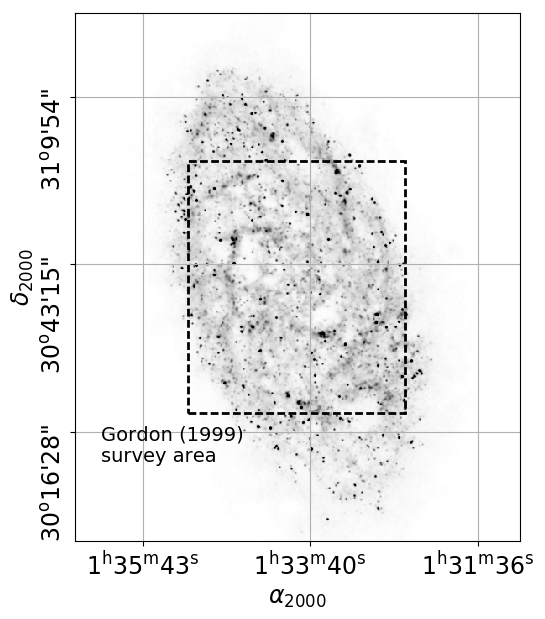

In [231]:
ra_cen = Angle('01h33m50.02s')
dec_cen = Angle('30d39m36.7s')
ra_offset, dec_offset = Angle('20m'), 0

rand_pix = [253+0, 323+height]
pix_cen = w.wcs_world2pix([[ra_cen.degree, dec_cen.degree, 0]], 1).squeeze()[:-1]
pix_cen_offset = w.wcs_world2pix([[(ra_cen + ra_offset).degree, (dec_cen + dec_offset).degree, 0]], 1).squeeze()[:-1]
                    #Because M33 FITS file has NAXIS=3, I have the extra argument = 0. The returned ndarray is 
                    #'squeezed' into a 1D array, and we discount the last element, which is the extra argument = 0.
pix_cen = np.asarray(pix_cen, dtype='int')

#Poached HI map-plotting code from RADSNRS

#show_pixels_on_Hmap([pix_cen[0], pix_cen_offset[0]], [pix_cen[1], pix_cen_offset[1]], m33_map=m33_map)
show_pixels_on_Hmap([], [], m33_map=m33_map)

**Moral of the story** - RA increasing to the left, Dec increasing up. But **pixels** are increasing rightward and topward.

Now that we are comfortable with how the pixellation works, lets look at the separations.

## Mini Astropy tutorial

I want to handle distances, sky coordinates etc. in a sophisticated manner, and **Astropy** provides the perfect framework for that. You can treat distances, skycoordinates as objects of the corresponding classes, and then use the methods to carry out manipulations.

**Weird**: `wcs.all_pix2world()` gives a slightly different skycoordinate than `wcs.utils.pixel_to_skycoord()`. I reversed this process, looking at `wcs.all_world2pix()` and `skycoord_to_pixel()` and the pixel locations they return are roughly the same, but not as integers. They are floating point numbers that are off by $\mathcal{O}(>10^{-7})$. This might not be that concerning, so just move on!

In [316]:
two_pixels = [[254, 323, 0], [255, 324, 0], [254, 324, 0], [255, 324, 0]]
print 'Pixel to SkyCoord conversion :-'
print '*pix2world() = ',w.all_pix2world([[255, 324, 0]],1)
c = astropy.wcs.utils.pixel_to_skycoord(255, 324, w, origin=1, mode='all')
print '*pixel_to_skycoord() = ',c
                #Calculates the sky coordinates for a given pixel, but its slightly off, on the order of the separation
                #between pixels. 
print '\nSkyCoord to pixel conversion :-'
print '*skycoord_to_pixel() = ',astropy.wcs.utils.skycoord_to_pixel(c, w, origin=1, mode='all')
print '*world2pix() = ', w.all_world2pix([[23.7887847,30.3284586,0]], 1)

Pixel to SkyCoord conversion :-
*pix2world() =  [[ 23.7887847  30.3284586   0.       ]]
*pixel_to_skycoord() =  <SkyCoord (FK5: equinox=2000.0): (ra, dec) in deg
    (23.7887847, 30.3284586)>

SkyCoord to pixel conversion :-
*skycoord_to_pixel() =  (array(255.00000000000435), array(324.0000000000023))
*world2pix() =  [[ 255.00000155  323.99999918    0.        ]]


In [317]:
c.from_pixel(254, 324, w, origin=1, mode='all') #This is a very smart, clean astropy method to convert between pixels and wcs.

<SkyCoord (FK5: equinox=2000.0): (ra, dec) in deg
    (23.79135934, 30.32844664)>

In [318]:
from astropy.wcs import utils
c1 = utils.pixel_to_skycoord([[255, 255],[254, 254]], [[323, 324],[323,324]], w, origin=1, mode='all')
print c1

<SkyCoord (FK5: equinox=2000.0): (ra, dec) in deg
    [[(23.78877098, 30.32623639), (23.7887847, 30.3284586)],
     [(23.79134555, 30.32622443), (23.79135934, 30.32844664)]]>


In [319]:
from astropy.coordinates import SkyCoord, Distance, Angle
print SkyCoord.from_pixel(254, 324, w, origin=1, mode='all')
print SkyCoord.from_pixel(254, 325, w, origin=1, mode='all')
print SkyCoord.from_pixel([254, 254], [324, 325], w, origin=1, mode='all')


<SkyCoord (FK5: equinox=2000.0): (ra, dec) in deg
    (23.79135934, 30.32844664)>
<SkyCoord (FK5: equinox=2000.0): (ra, dec) in deg
    (23.79137313, 30.33066885)>
<SkyCoord (FK5: equinox=2000.0): (ra, dec) in deg
    [(23.79135934, 30.32844664), (23.79137313, 30.33066885)]>


**Measuring separation between objects**: Very messy to do this manually. You'll have to know the conversion between arcseconds and parsecs at the corresponding distances, convert RA and decs to degrees etc. Instead, define all measurements as objects of `SkyCoord`, `Angle` and `Distance` classes, specify input measurements and go! For example, below is a way to measure separation *in physical units* between two sky positions with known RA and Dec. I'm only showing result for 1 arcsecond separation at the distance of M33 = 840 kpc, so you can verify the result.

Physical separation (pc) at M33 =  32.5797131666 pc
Angular separation (arcsec) =  8.00006arcsec


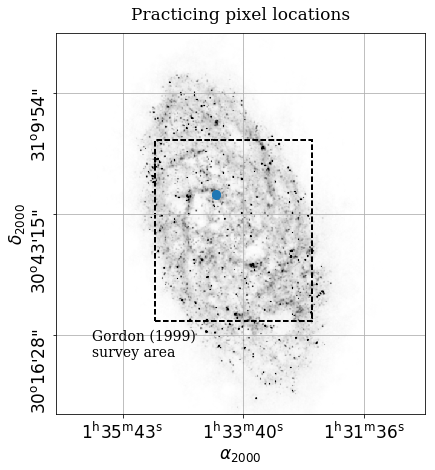

In [320]:
dist = float(Config.get('ObsParameters', 'distance')) #Distance measurement from the config file in Mpc. Output is 
                        #a string, so float() converts the type to float
xp = [354, 354]
yp = [532, 533]
c1 = SkyCoord(utils.pixel_to_skycoord(xp[0], yp[0], w, origin=1, mode='all').transform_to('icrs'), distance=dist*u.Mpc) #Sky position #1
c2 = SkyCoord(utils.pixel_to_skycoord(xp[1], yp[1], w, origin=1, mode='all').transform_to('icrs'), distance=dist*u.Mpc) #Sky position #2, 1 arcsec away. Note this
                                                    #is different from 1 sec difference in RA.
    
d = Distance(c1.separation_3d(c2), unit=u.pc) #Separation. The Distance class forces the object to be in units of pc.

print 'Physical separation (pc) at M33 = ', d
print 'Angular separation (arcsec) = ', Angle(c1.separation(c2), unit=u.arcsec)

show_pixels_on_Hmap(xp, yp, m33_map=m33_map)

<SkyCoord (FK5: equinox=2000.0): (ra, dec) in deg
    (23.78879843, 30.33068081)>
<SkyCoord (FK5: equinox=2000.0): (ra, dec) in deg
    (23.78970797, 30.47734608)>
<SkyCoord (FK5: equinox=2000.0): (ra, dec) in deg
    (23.67036283, 30.3311762)>
<SkyCoord (FK5: equinox=2000.0): (ra, dec) in deg
    (23.67109434, 30.47784221)>


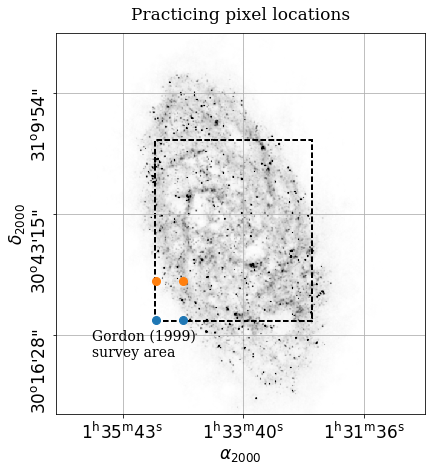

In [321]:
from astropy.coordinates import SkyCoord, Distance, Angle
testmap = np.array([])
print SkyCoord.from_pixel(254, 324, w, mode='all')
print SkyCoord.from_pixel(254, 390, w, mode='all')
print SkyCoord.from_pixel(300, 324, w, mode='all')
print SkyCoord.from_pixel(300, 390, w, mode='all')
test_pix_ra_dec = SkyCoord.from_pixel([[255, 255],[300,300]],[[325, 390],[325, 390]], w, mode='all')
test_pix = SkyCoord.to_pixel(test_pix_ra_dec, w, mode='all')

show_pixels_on_Hmap(test_pix[0], test_pix[1], m33_map=m33_map)

**Can SkyCoord methods take 2D inputs?** I'm trying to see if the SkyCoord algorithm takes any `ndarray` and spits out the corresponding ndarray of sky coordinates. The only way to check this is to plot it on the map, see if its plotting the adjacent pixels correctly.

In [322]:
dist = float(Config.get('ObsParameters', 'distance')) #Distance measurement from the config file in Mpc. Output is 
                        #a string, so float() converts the type to float.
    
c1 = SkyCoord(utils.pixel_to_skycoord([[254, 254],[255,255]], [324], w, origin=1, mode='all').transform_to('icrs'), distance=dist*u.Mpc) #Sky position #1
c2 = SkyCoord(utils.pixel_to_skycoord(255, 324, w, origin=1, mode='all').transform_to('icrs'), distance=dist*u.Mpc) #Sky position #2, 1 arcsec away. Note this
                                                    #is different from 1 sec difference in RA.
    
d = Distance(c1.separation_3d(c2), unit=u.pc) #Separation. The Distance class forces the object to be in units of pc.
print c1
print c2
print '\nPhysical separation (pc) at M33 = ', d
print '\nAngular separation (arcsec) = ', Angle(c1.separation(c2), unit=u.arcsec)

<SkyCoord (ICRS): (ra, dec, distance) in (deg, deg, Mpc)
    [[(23.79134942, 30.32844656, 0.84), (23.79134942, 30.32844656, 0.84)],
     [(23.78877479, 30.32845852, 0.84), (23.78877479, 30.32845852, 0.84)]]>
<SkyCoord (ICRS): (ra, dec, distance) in (deg, deg, Mpc)
    (23.78877479, 30.32845852, 0.84)>

Physical separation (pc) at M33 =  [[ 32.58083934  32.58083934]
 [  0.           0.        ]] pc

Angular separation (arcsec) =  [[u'8.00033arcsec' u'8.00033arcsec']
 [u'0arcsec' u'0arcsec']]


**Okay, I'll put a hold on the area map**, and assume for now that all pixels cover the same sky area. Since M33 is very far away, the planar and celestial sphere area covered by M33 should roughly be same, and so assuming pixels are all the same square is fine. (Actually, isn't that true anyway? i.e. pixels in an image are all the same area?). 

**Area of pixels = $32.6^2$ $\rm{pc}^2$ = $1062.76$ $\rm{pc}^2$**

In [323]:
a = np.arange(30).reshape([5,6]) 
print a
a1 = np.split(a,3,axis=1) 

[[ 0  1  2  3  4  5]
 [ 6  7  8  9 10 11]
 [12 13 14 15 16 17]
 [18 19 20 21 22 23]
 [24 25 26 27 28 29]]


In [93]:
1062.76*16

17004.16